# ANÁLISIS DESCRIPTIVO

Como se detalla en el README, el objetivo del siguiente análisis es determinar las disparidades regionales dentro de Argentina en la ocurrencia de enfermedades no transmisibles (en particular aquellas relacionadas con el estilo de vida: diabetes, hipertensión y colesterol), para mayor sencillez las denominaremos ENT (enfermedades No transmisibles). Se analizarán disparidades regionales y a partir de esto, las causas de las mismas.  

Se realizarán en esta sección algunos análisis que permitan entender si existen las disparidades por región y si hay alguna otra variable que esté influyendo en los resultados obtenidos y que no corresponda a diparidades regionales sino a una mala obtención de la muestra.

Realizaremos una división general para determinar las variables que se considerarán "posibles causas" y las variables que consideramos "consecuencias". Las consecuencias hace referencia a la aparición de enfermedades

### Variables consideradas CAUSAS

1. caracteristicas_vivienda
2. caracteristicas_hogar
3. ingresos_hogar
4. caracteristicas_encuestado
5. salud_y_af
6. tabaquismo
7. pesocorporal
8. alimentacion
9. consumo_alcohol

### Variables consideradas CONSECUENCIAS

1. hipertension
2. colesterlo
3. diabetes

### Variables ordenadora

El dominio_geografico, y en particular la columna "region" determinarán la división


In [105]:
#importanción de librerías a utilizar

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler
from colorama import init, Fore, Style

In [106]:
# IMPORTACIÓN DEL DATASET REDUCIDO LUEGO DEL PROCESAMIENTO DE COLUMNAS

df = pd.read_csv('friesgo_2018_reduc.csv',  sep=',', encoding='utf-8')

df.head(5)

,id,region,tamanio_aglomerado,tipo_vivienda,obtiene_gas,obtiene_agua,baño,cant_componentes,tipo_hogar,ingresos,...,promedio_fv_diario,consumo_5porc_fv,medido_colesterol,colesterol_alto,consumido_alcohol,consumo_regular_riesgo,dijeron_diabetes,familiares_directos_diabetes,familiares_no_directos_diabetes,control_diabetes
0,1128639,1,1,3,1,1,1,2,2,50000,...,4.00,2,1,2,1,2.0,2,2,2,1
1,1709939,1,1,1,1,1,1,3,4,40000,...,6.43,1,1,1,1,2.0,2,2,2,1
2,6874130,1,1,3,1,1,1,2,2,40000,...,2.86,2,1,2,1,2.0,2,2,2,1
3,10319375,1,1,3,4,1,1,1,1,80000,...,1.43,2,1,1,1,2.0,2,2,1,1
4,11140857,1,1,3,1,1,1,2,8,30000,...,1.43,2,1,2,1,2.0,2,2,99,1


# ANÁLISIS DE OCURRENCIA DE LAS ENT POR REGIÓN



## COLESTEROL POR REGIÓN

In [107]:
#usaremos la variable "region" y la variable "colesterol_alto". Calcularemos porcentaje de colesterol alto en cada region. El porcentaje se calcula como cantidad de '1' respecto al total de '2'

#agrupamos para poder calcular porcentajes de cada situación (NO solo conteo)

###########################################################3

colesterol_si = df[df['colesterol_alto']==1]   #filtro solo valores 1 que corresponde a colesterol alto
colesterol_no = df[df['colesterol_alto']==2]    #filtro solo valores 2 que corresponde a colesterol normal

suma_colesterol_si = colesterol_si.groupby('region')['colesterol_alto'].sum()     #sumo total

suma_colesterol_no = colesterol_no.groupby('region')['colesterol_alto'].sum()     #sumo total

print(f'Total de personas con colesterol por región: {suma_colesterol_si}\n')
print(f'Total de personas sin colesterol por región: {suma_colesterol_no}')

Total de personas con colesterol por región: region
1     841
2    1852
3    1040
4     681
5     578
6     815
Name: colesterol_alto, dtype: int64

Total de personas sin colesterol por región: region
1     4838
2    13028
3     7302
4     5740
5     3584
6     5602
Name: colesterol_alto, dtype: int64


In [108]:
#dado que las sumas totales por región son dispares calcularemos el porcentaje de personas con colesterol alto para poder comparar


colesterol_si_prom = (suma_colesterol_si * 100)/(suma_colesterol_si + suma_colesterol_no)  #calculo porcentaje de alto sobre el total 

colesterol_si_prom = colesterol_si_prom.round(2)   #limito a 2 decimales la salida

print(f'promedio de personas con colesterol por región: {colesterol_si_prom}')



promedio de personas con colesterol por región: region
1    14.81
2    12.45
3    12.47
4    10.61
5    13.89
6    12.70
Name: colesterol_alto, dtype: float64


In [109]:
dfc = colesterol_si_prom.reset_index()

dfc.columns = ['region', 'Porcentaje_colesterol_alto']

print(dfc)

   region  Porcentaje_colesterol_alto
0       1                       14.81
1       2                       12.45
2       3                       12.47
3       4                       10.61
4       5                       13.89
5       6                       12.70


## HIPERTENSIÓN POR REGIÓN

In [110]:

hipertension_si = df[(df['veces_presion_alta'] == 1)]  #filtro solo valores 1 y 2 que corresponde a hipertesnion 1 vez y 2 es hipertension + de 1 vez

hipertension_si_2 = df[df['veces_presion_alta']==2]   #filtro solo valores 2 que corresponde a hipertension + de 1 vez

hipertension_no = df[df['veces_presion_alta']==3]    #filtro solo valores 3 que corresponde no presion alta

suma_hipertension_si = hipertension_si.groupby('region')['veces_presion_alta'].sum()     #sumo total

suma_hipertension_si_2 = hipertension_si_2.groupby('region')['veces_presion_alta'].sum()     #sumo total

suma_hipertension_no = hipertension_no.groupby('region')['veces_presion_alta'].sum()     #sumo total

print(suma_hipertension_si)
print(suma_hipertension_si_2)
print(suma_hipertension_no)

region
1     377
2    1024
3     516
4     527
5     292
6     497
Name: veces_presion_alta, dtype: int64
region
1    1412
2    4124
3    1868
4    1766
5    1214
6    1518
Name: veces_presion_alta, dtype: int64
region
1     6600
2    16056
3     9834
4     6447
5     4446
6     7170
Name: veces_presion_alta, dtype: int64


In [111]:
#promedios

hipertension_si_prom = ((suma_hipertension_si + suma_hipertension_si_2) * 100)/(suma_hipertension_si + suma_hipertension_si_2 + suma_hipertension_no)  #calculo porcentaje de alto sobre el total 

hipertension_si_prom = hipertension_si_prom.round(2)   #limito a 2 decimales la salida

print(hipertension_si_prom)

region
1    21.33
2    24.28
3    19.51
4    26.24
5    25.30
6    21.94
Name: veces_presion_alta, dtype: float64


In [112]:
dfh = hipertension_si_prom.reset_index()

dfh.columns = ['region', 'Porcentaje_hipertension']

print(dfh)

   region  Porcentaje_hipertension
0       1                    21.33
1       2                    24.28
2       3                    19.51
3       4                    26.24
4       5                    25.30
5       6                    21.94


## DIABETES POR REGIÓN

In [113]:

diabetes_si = df[df['dijeron_diabetes']==1]   #filtro solo valores 1 que corresponde a diabetes
diabetes_no = df[df['dijeron_diabetes']==2]    #filtro solo valores 2 que corresponde a no diabetes

suma_diabetes_si = diabetes_si.groupby('region')['dijeron_diabetes'].sum()     #sumo total

suma_diabetes_no = diabetes_no.groupby('region')['dijeron_diabetes'].sum()     #sumo total

print(suma_diabetes_si)
print(suma_diabetes_no)

region
1     405
2    1177
3     602
4     434
5     354
6     538
Name: dijeron_diabetes, dtype: int64
region
1     5768
2    14570
3     8274
4     6268
5     4074
6     6210
Name: dijeron_diabetes, dtype: int64


In [114]:
#promedios


diabetes_si_prom = (suma_diabetes_si * 100)/(suma_diabetes_si + suma_diabetes_no)  #calculo porcentaje de alto sobre el total 

diabetes_si_prom = diabetes_si_prom.round(2)   #limito a 2 decimales la salida

print(diabetes_si_prom)


region
1    6.56
2    7.47
3    6.78
4    6.48
5    7.99
6    7.97
Name: dijeron_diabetes, dtype: float64


In [115]:
dfd = diabetes_si_prom.reset_index()

dfd.columns = ['region', 'Porcentaje_diabetes']

print(dfd)

   region  Porcentaje_diabetes
0       1                 6.56
1       2                 7.47
2       3                 6.78
3       4                 6.48
4       5                 7.99
5       6                 7.97


## UNIMOS COLUMNAS

In [116]:
df2 = dfc.merge(dfh, on= 'region', how='outer' ).merge(dfd, on= 'region', how='outer')  
df2

,region,Porcentaje_colesterol_alto,Porcentaje_hipertension,Porcentaje_diabetes
0,1,14.81,21.33,6.56
1,2,12.45,24.28,7.47
2,3,12.47,19.51,6.78
3,4,10.61,26.24,6.48
4,5,13.89,25.30,7.99
5,6,12.70,21.94,7.97


In [117]:
#nombramos la regiones 

region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}
df2['region'] = df2['region'].map(region_dict)

print(df2)

          region  Porcentaje_colesterol_alto  Porcentaje_hipertension  \
0  Metropolitana                       14.81                    21.33   
1       Pampeana                       12.45                    24.28   
2       Noroeste                       12.47                    19.51   
3        Noreste                       10.61                    26.24   
4           Cuyo                       13.89                    25.30   
5     Patagónica                       12.70                    21.94   

   Porcentaje_diabetes  
0                 6.56  
1                 7.47  
2                 6.78  
3                 6.48  
4                 7.99  
5                 7.97  



###  <u> PORCENTAJE DE PERSONAS CON COLESTEROL ALTO, HIPERTENSIÓN Y DIABETES POR REGIÓN </u> 
 


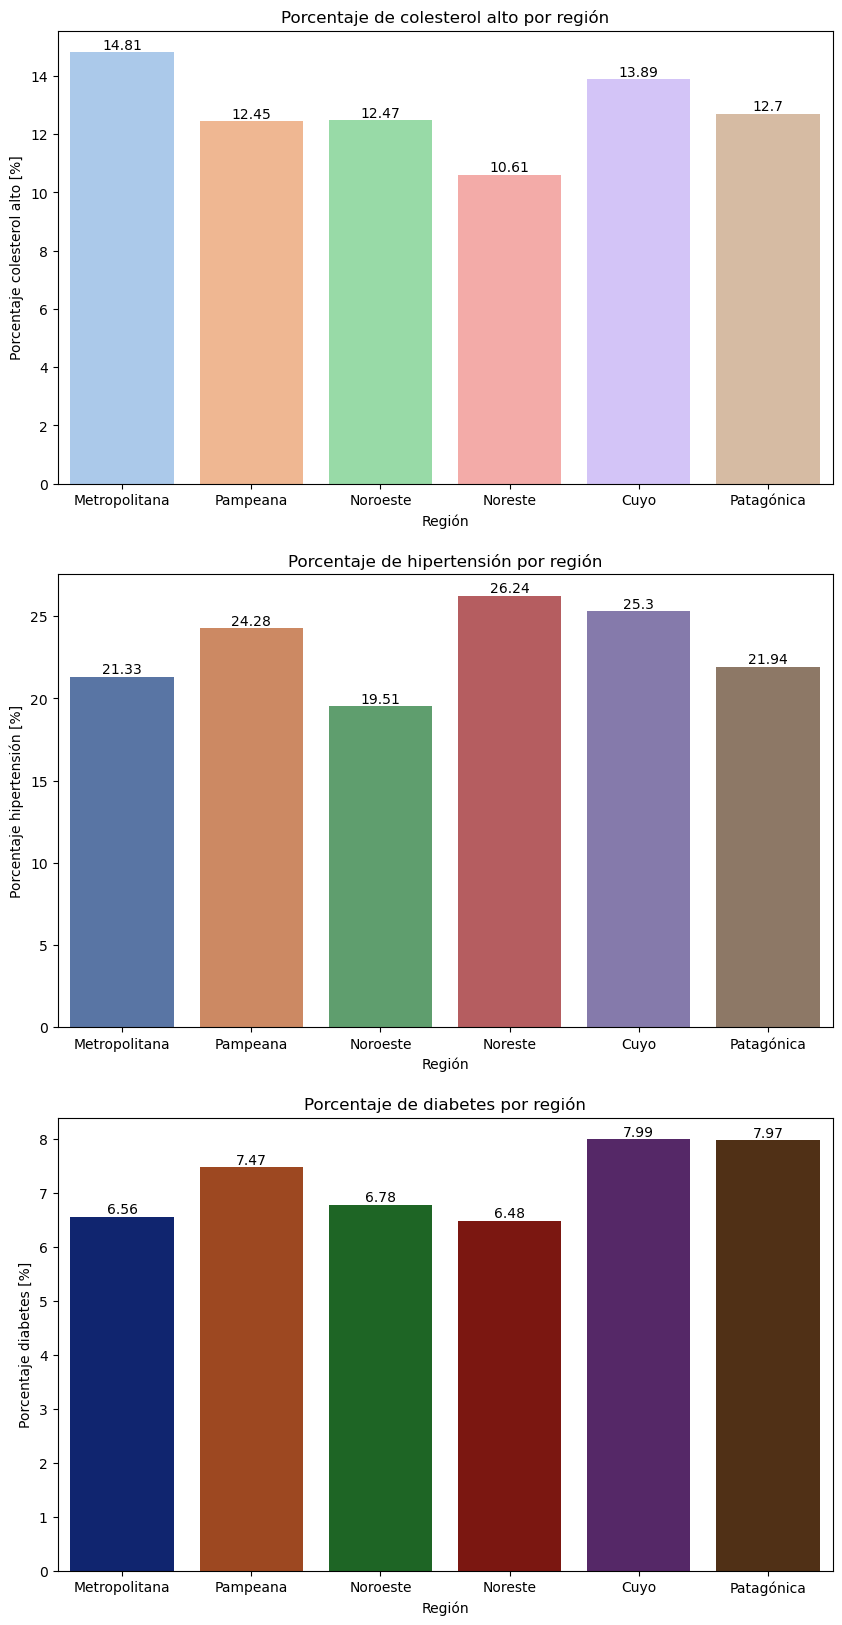

In [118]:

plt.figure(figsize=(10, 20))

# Gráfico 1: Comparación de colesterol alto por región
plt.subplot(3, 1, 1)
sns.barplot(data=df2, x='region', y='Porcentaje_colesterol_alto', palette='pastel')
plt.title('Porcentaje de colesterol alto por región')
plt.xlabel('Región')
plt.ylabel('Porcentaje colesterol alto [%]')


ax = plt.gca()
for bar in ax.patches:
    yval = bar.get_height()  # Altura de la barra
    xval = bar.get_x() + bar.get_width() / 2  # Posición central de la barra en el eje X
    ax.text(xval, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)  # Mostrar el valor encima de la barra


# Gráfico 2: Comparación de hipertensión por región
plt.subplot(3, 1, 2)
sns.barplot(data=df2, x='region', y='Porcentaje_hipertension', palette='deep')
plt.title('Porcentaje de hipertensión por región')
plt.xlabel('Región')
plt.ylabel('Porcentaje hipertensión [%]')


ax = plt.gca()
for bar in ax.patches:
    yval = bar.get_height()  # Altura de la barra
    xval = bar.get_x() + bar.get_width() / 2  # Posición central de la barra en el eje X
    ax.text(xval, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)  # Mostrar el valor encima de la barra


# Gráfico 3: Comparación de diabetes por región
plt.subplot(3, 1, 3)
sns.barplot(data=df2, x='region', y='Porcentaje_diabetes', palette='dark')
plt.title('Porcentaje de diabetes por región')
plt.xlabel('Región')
plt.ylabel('Porcentaje diabetes [%]')


ax = plt.gca()
for bar in ax.patches:
    yval = bar.get_height()  # Altura de la barra
    xval = bar.get_x() + bar.get_width() / 2  # Posición central de la barra en el eje X
    ax.text(xval, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)  # Mostrar el valor encima de la barra


#plt.tight_layout()  # Ajustar espaciado entre los subplots
plt.show()

## Conclusión de los gráficos


1. Se observa que hay mayor ocurrencia de hipertensión, luego de colesterol y por último la enfermedad menos común es la diabetes en todas las regiones.
2. La diferencia entre el mayor y menor porcentaje en cada enfermedad son: COLESTEROL: 4.22%, HIPERTENSIÓN: 6.26% Y DIABETES: 1.53%.

## DISTRIBUCIÓN DE EDADES POR REGIÓN


Analizaremos si luego de realizar el drop de algunas filas siguen estando balanceadas la cantidad de hombres vs mujeres y el promedio de edad se mantiene similar por region

In [119]:
#hacemos un subdataset

df3 = df[['region', 'edad', 'sexo']]

In [120]:
#nombramos la regiones 

region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}
df3['region'] = df3['region'].map(region_dict)



#sexo_dict = {
#    1: 'Varon',
#    2: 'Mujer'
#}
#df3['sexo'] = df3['sexo'].map(sexo_dict)

print(df3)

              region  edad  sexo
0      Metropolitana    32     1
1      Metropolitana    65     2
2      Metropolitana    33     2
3      Metropolitana    64     2
4      Metropolitana    24     1
...              ...   ...   ...
26193     Patagónica    26     2
26194     Patagónica    62     1
26195     Patagónica    74     2
26196     Patagónica    44     2
26197     Patagónica    40     2

[26198 rows x 3 columns]


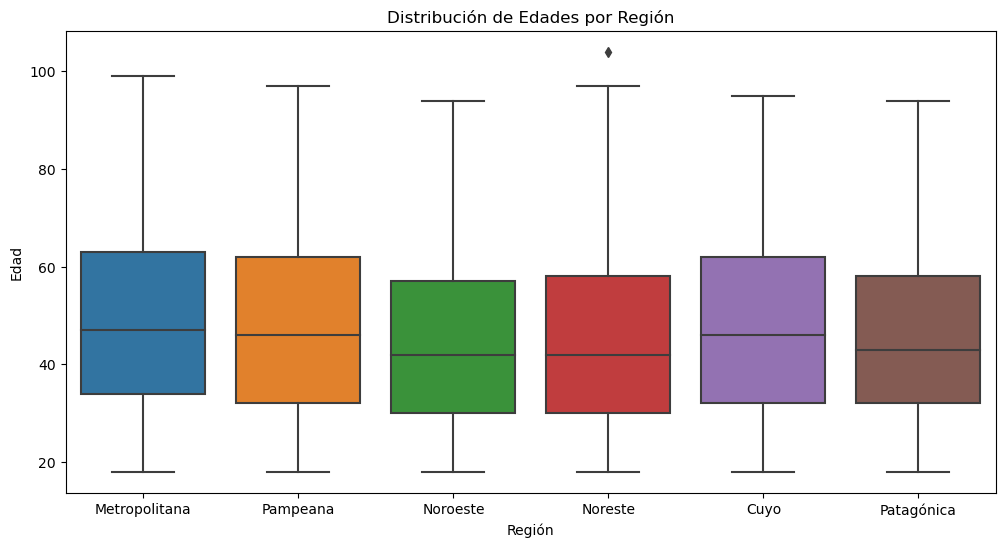

In [121]:
# boxplot para edades por región
plt.figure(figsize=(12, 6))
sns.boxplot(x=df3['region'], y=df3['edad'], data=df3)

plt.title('Distribución de Edades por Región')
plt.xlabel('Región')
plt.ylabel('Edad')
plt.show()

In [122]:

mediana_region = df3.groupby('region')['edad'].median()
print(mediana_region)

region
Cuyo             46
Metropolitana    47
Noreste          42
Noroeste         42
Pampeana         46
Patagónica       43
Name: edad, dtype: int64


## DISTRIBUCIÓN DE SEXO POR REGIÓN

sexo              1     2
region                   
Cuyo           1020  1379
Metropolitana  1464  1836
Noreste        1544  2038
Noroeste       2134  2618
Pampeana       3764  4740
Patagónica     1609  2052


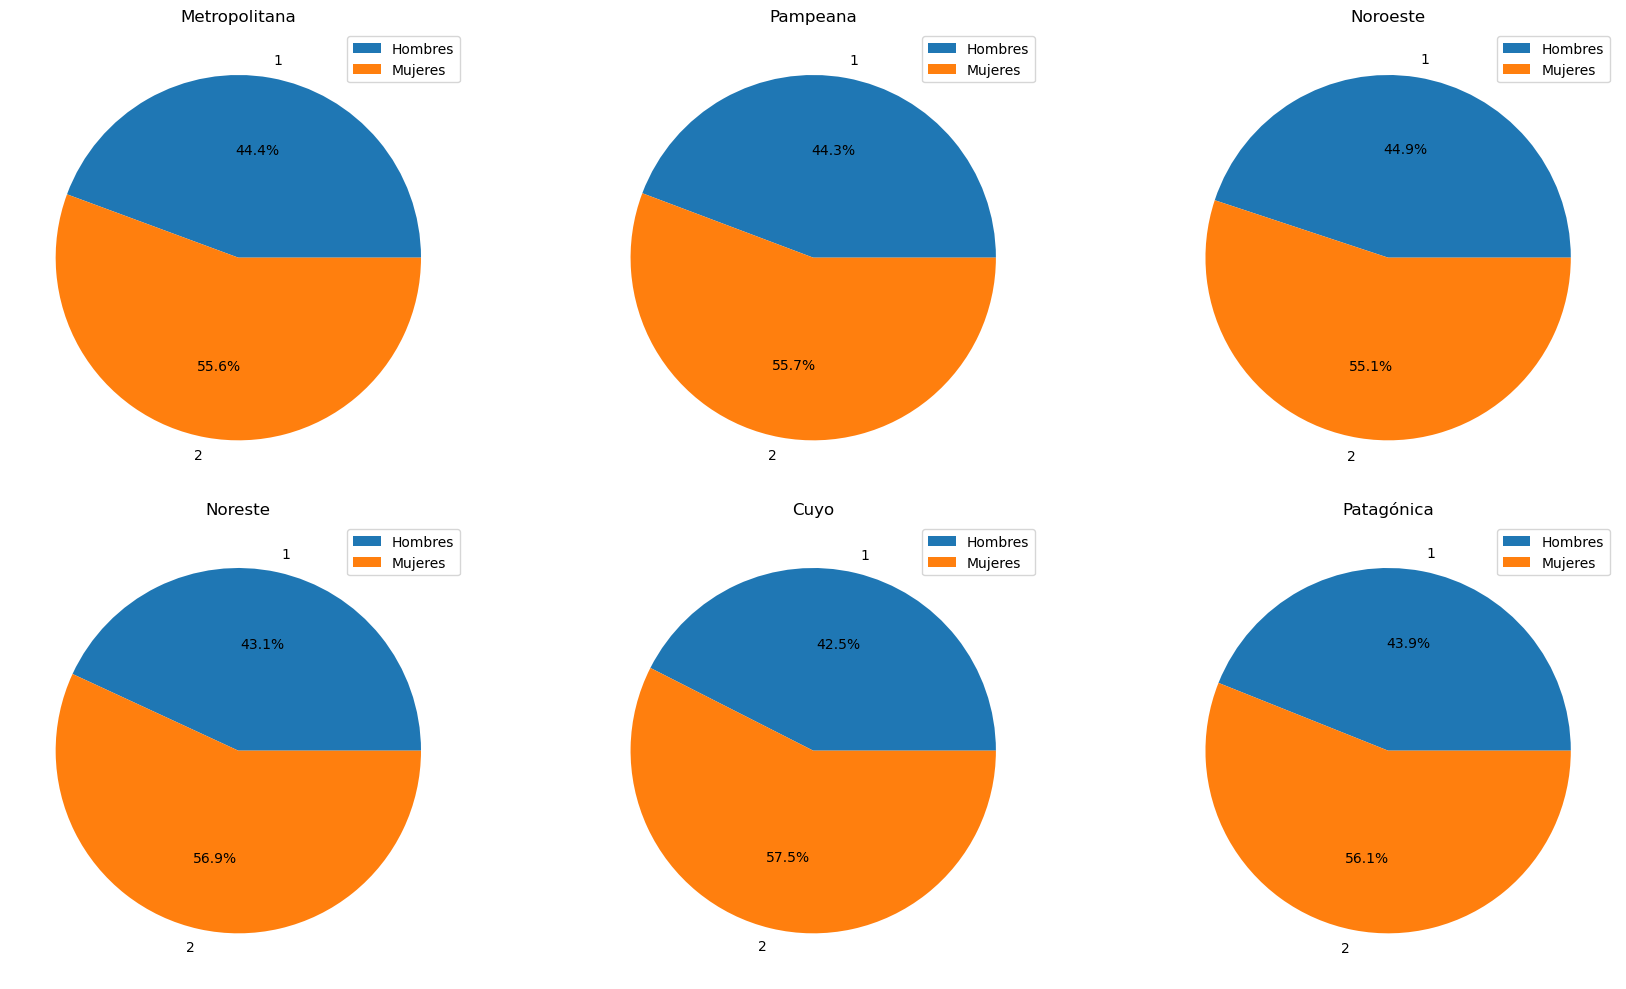

In [123]:
#agrupamos para el grafico por sexos 
conteo_sexo_region = df3.groupby(['region', 'sexo']).size().unstack()
print(conteo_sexo_region)


conteo_sexo_region.rename(columns={'1': 'Hombres', '2': 'Mujeres'}, inplace=True)

orden_regiones = ['Metropolitana', 'Pampeana', 'Noroeste', 'Noreste', 'Cuyo', 'Patagónica']


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, region in enumerate(orden_regiones):
    ax = axs.flatten()[i]
    conteo_sexo_region.loc[region].plot(kind='pie', ax=ax, autopct='%1.1f%%')    
    ax.set_title(region)
    ax.set_ylabel('')
    ax.legend(['Hombres', 'Mujeres'], loc='upper right')

plt.tight_layout()
plt.show()




## DISTRIBUCIÓN DE EDADES POR SEXO y POR REGIÓN

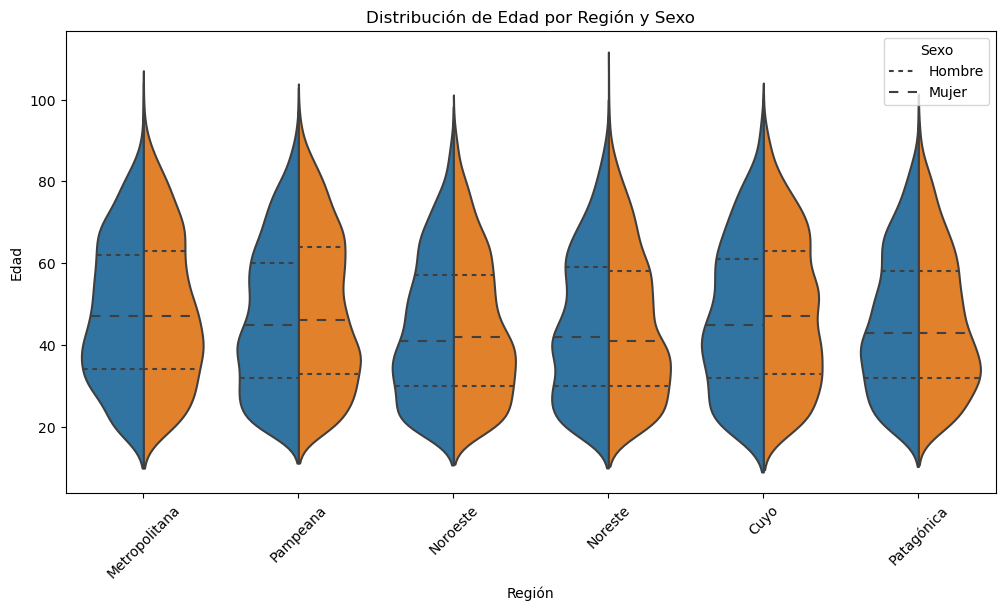

In [125]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=df3['region'], y=df3['edad'], hue=df3['sexo'], data=df3, split=True, inner="quart")
plt.title('Distribución de Edad por Región y Sexo')
plt.xlabel('Región')
plt.ylabel('Edad')
plt.legend(title='Sexo', loc='upper right', labels=['Hombre', 'Mujer'])
plt.xticks(rotation=45)
plt.show()


## Conclusiones de los gráficos por edad y por sexo


Dado que la población analizada en cada región se encuentra dividida en 50% aproximadamente y No se observan grandes diferencias porcentuales entre las edades de los grupos poblacionales ni entre sexos, se considera que los resultados del análisis serán lo suficientemente generales